In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets/Assignment3'
%ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML datasets/Assignment3
'Dataset Description.csv'   more_than_50k.csv   population.csv


In [5]:
import warnings
warnings.filterwarnings('ignore')

#importing all needed libraries
!pip install pyclustering

from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyclustering.cluster.kmedians import kmedians
from sklearn.decomposition import PCA
from pyclustering.cluster import cluster_visualizer
from tqdm import tqdm

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=408096ddebee2c3452067b7c2bb33b1fa6b65e068bcb22944f5327a52edb4b4f
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


#1. Preprocessing

In [96]:
# loading dataset
data = pd.read_csv('population.csv')

Question 1.1

In [97]:
#replacing ? with NaN values
data = data.replace(" ?",np.nan)

Question 1.2

In [98]:
#counting null values in each column
data.isnull().sum()

AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64

In [99]:
#40% is 79809.2
#dropping columns whose null values count is more than 79809.2
data = data.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'],axis=1)

#2. Feature Analysis

Question 2.1

Text(0.5, 1.0, 'ACLSWKR')

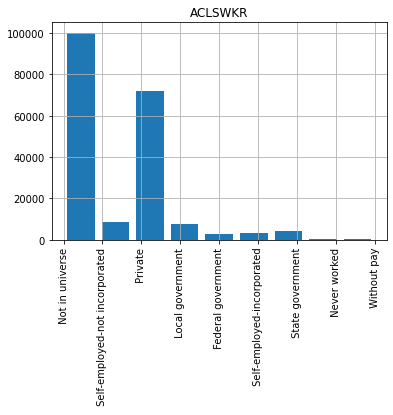

In [100]:
#plotting for categorical values
data["ACLSWKR"].hist(bins=9, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("ACLSWKR")

Text(0.5, 1.0, 'AHGA')

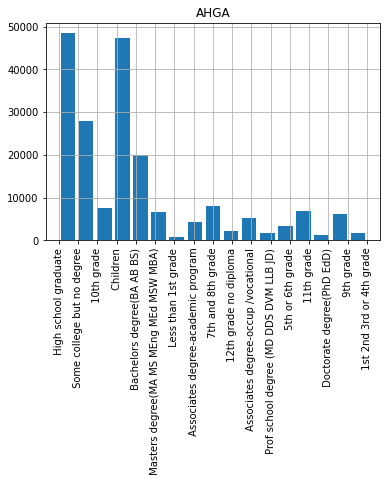

In [101]:
data["AHGA"].hist(bins=17, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AHGA")

Text(0.5, 1.0, 'AHSCOL')

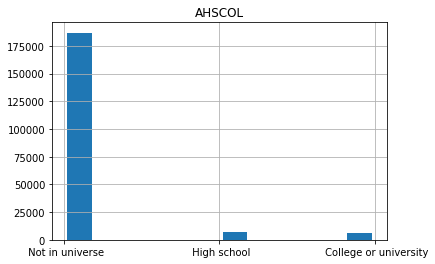

In [102]:
data["AHSCOL"].hist(bins=10, figsize=(6, 4),rwidth=0.8)
plt.title("AHSCOL")

Text(0.5, 1.0, 'AMARITL')

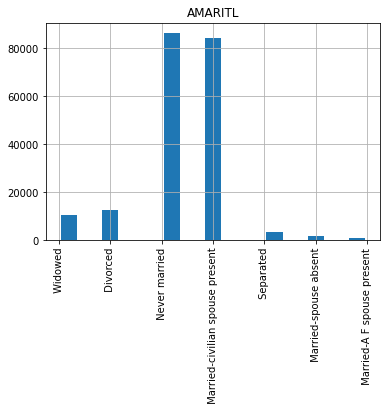

In [103]:
data["AMARITL"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMARITL")

Text(0.5, 1.0, 'AMJIND')

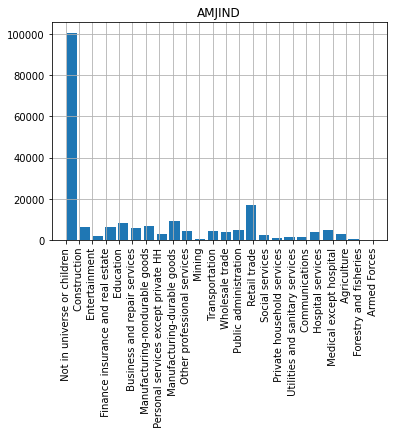

In [104]:
data["AMJIND"].hist(bins=24, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMJIND")

Text(0.5, 1.0, 'AMJOCC')

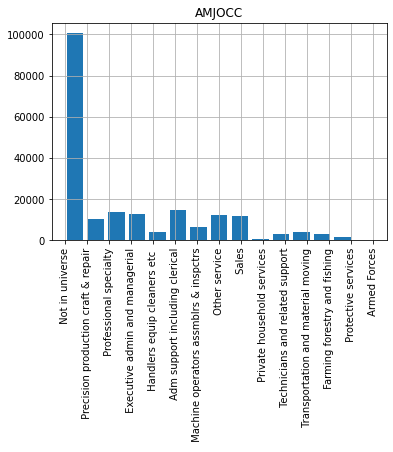

In [105]:
data["AMJOCC"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMJOCC")

Text(0.5, 1.0, 'ARACE')

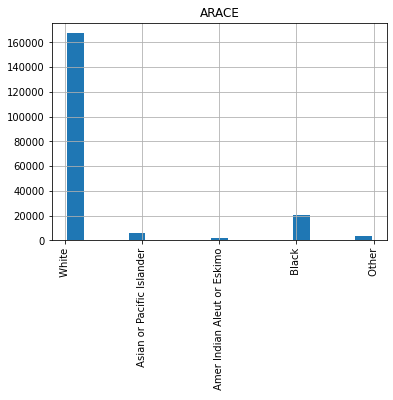

In [106]:
data["ARACE"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("ARACE")

Text(0.5, 1.0, 'AREORGN')

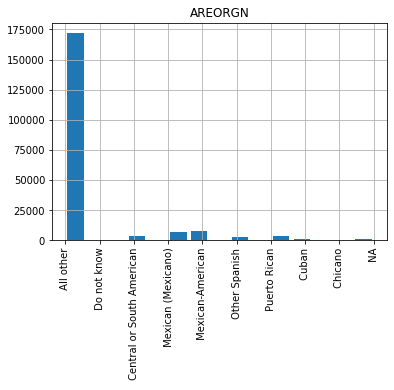

In [107]:
data["AREORGN"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AREORGN")

Text(0.5, 1.0, 'ASEX')

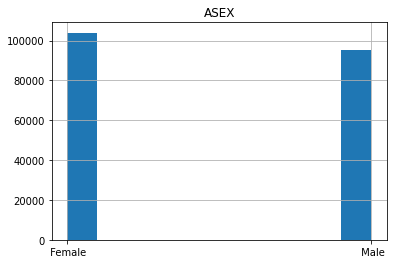

In [111]:
data["ASEX"].hist(figsize=(6, 4))
plt.title("ASEX")

Text(0.5, 1.0, 'AUNMEM')

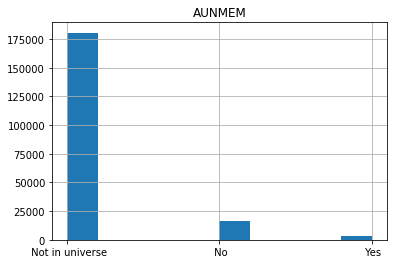

In [110]:
data["AUNMEM"].hist(figsize=(6, 4))
plt.title("AUNMEM")

Text(0.5, 1.0, 'AUNTYPE')

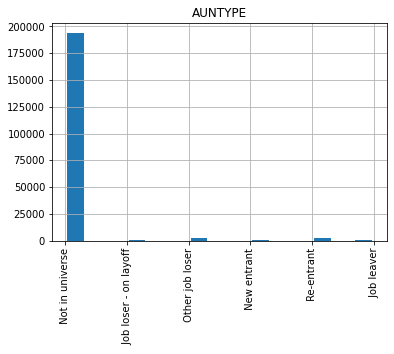

In [109]:
data["AUNTYPE"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AUNTYPE")

Text(0.5, 1.0, 'AWKSTAT')

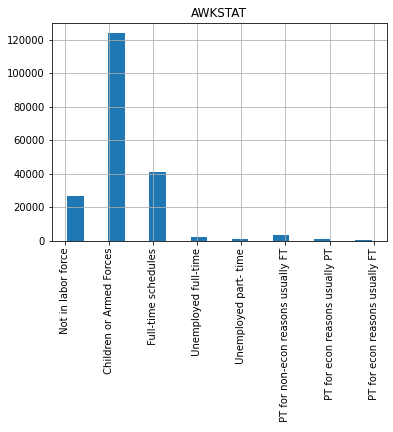

In [112]:
data["AWKSTAT"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AWKSTAT")

Text(0.5, 1.0, 'FILESTAT')

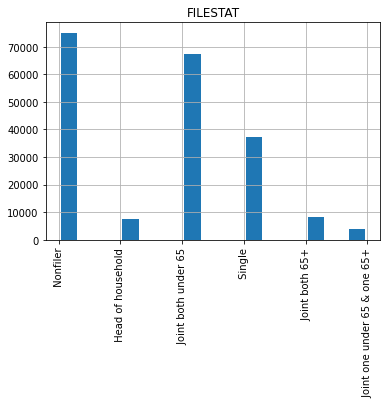

In [116]:
data["FILESTAT"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("FILESTAT")

Text(0.5, 1.0, 'GRINREG')

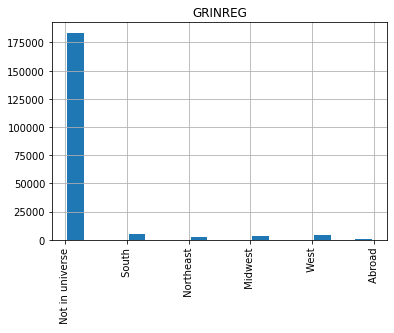

In [115]:
data["GRINREG"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("GRINREG")

Text(0.5, 1.0, 'GRINST')

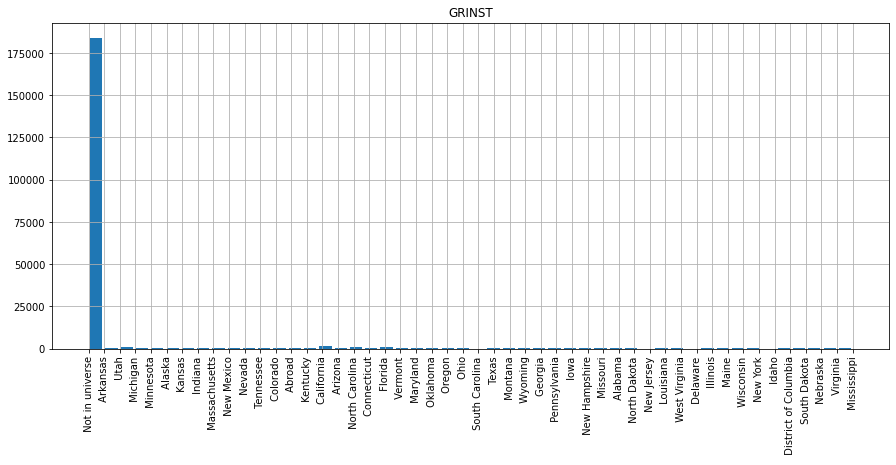

In [114]:
data["GRINST"].hist(bins=50, figsize=(15, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("GRINST")

Text(0.5, 1.0, 'HHDFMX')

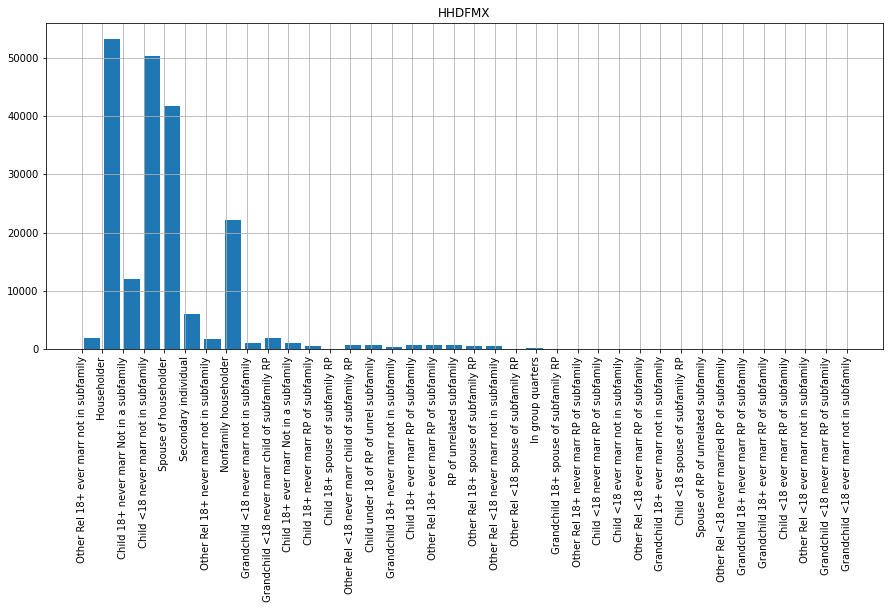

In [113]:
data["HHDFMX"].hist(bins=38, figsize=(15, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("HHDFMX")

Text(0.5, 1.0, 'HHDREL')

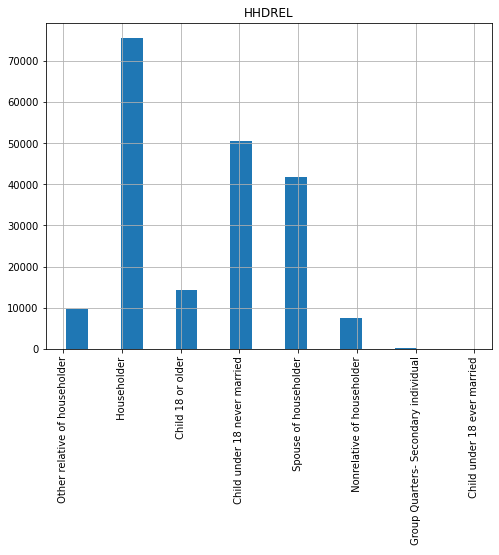

In [117]:
data["HHDREL"].hist(bins=15, figsize=(8, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("HHDREL")

Text(0.5, 1.0, 'MIGSAME')

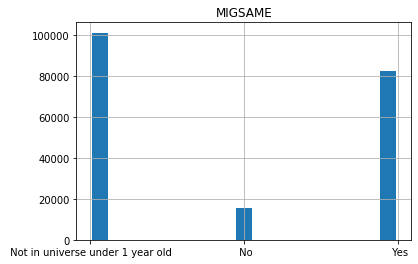

In [118]:
data["MIGSAME"].hist(bins=15, figsize=(6, 4), rwidth=0.8)
plt.title("MIGSAME")

Text(0.5, 1.0, 'PARENT')

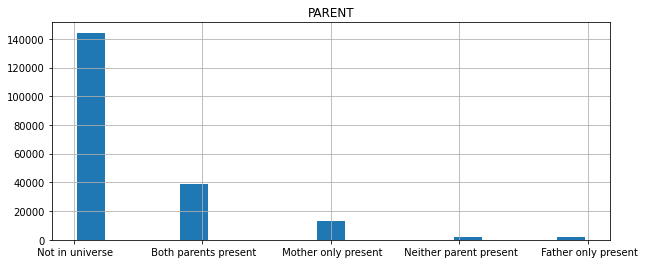

In [119]:
data["PARENT"].hist(bins=15, figsize=(10, 4), rwidth=0.8)
plt.title("PARENT")

Text(0.5, 1.0, 'PEFNTVTY')

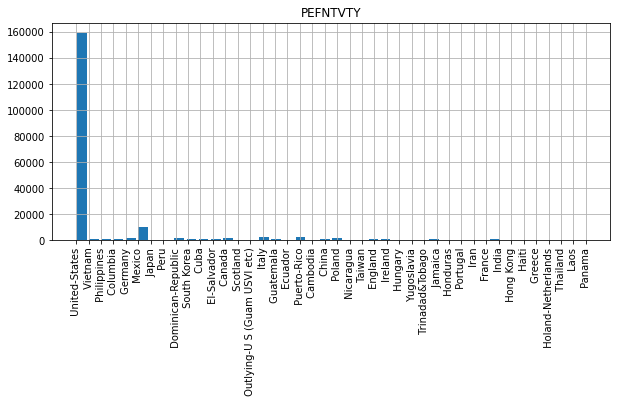

In [120]:
data["PEFNTVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PEFNTVTY")

Text(0.5, 1.0, 'PEMNTVTY')

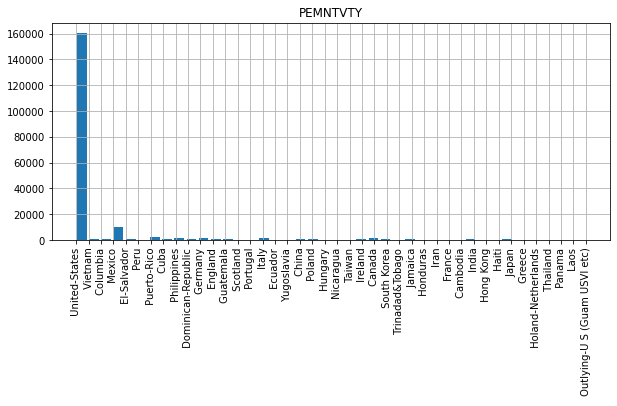

In [121]:
data["PEMNTVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PEMNTVTY")

Text(0.5, 1.0, 'PENATVTY')

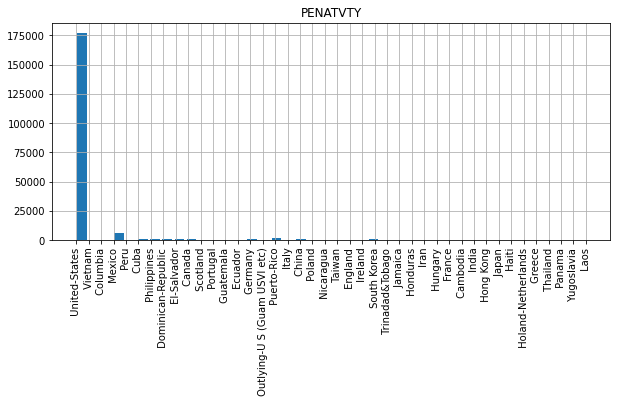

In [122]:
data["PENATVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PENATVTY")

Text(0.5, 1.0, 'PRCITSHP')

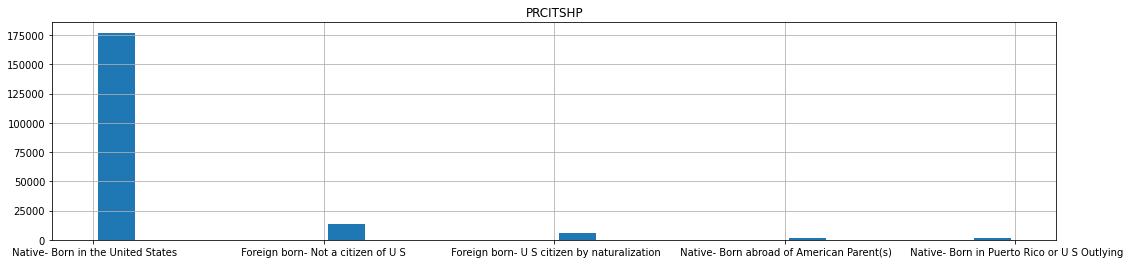

In [123]:
data["PRCITSHP"].hist(bins=20, figsize=(18, 4), rwidth=0.8)
plt.title("PRCITSHP")

Text(0.5, 1.0, 'VETQVA')

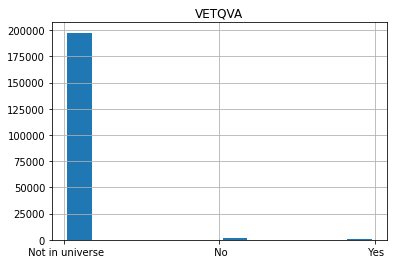

In [124]:
data["VETQVA"].hist(bins=10, figsize=(6, 4), rwidth=0.8)
plt.title("VETQVA")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f252b222210>,
      dtype=object)

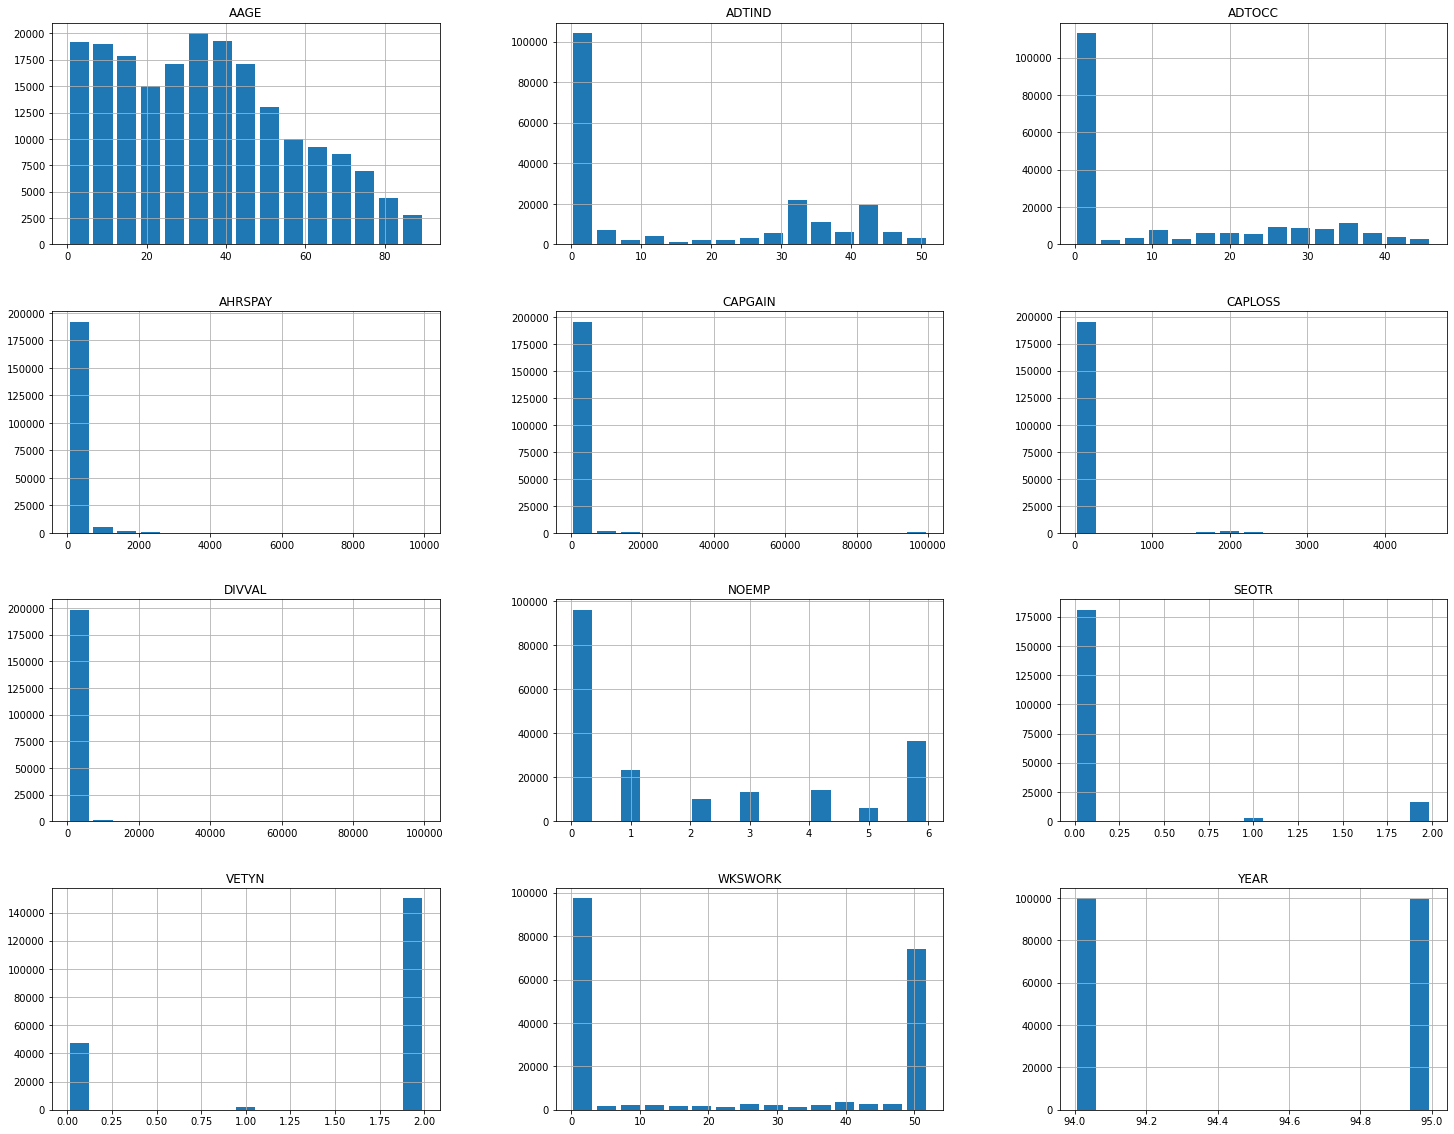

In [125]:
#plots of numerical columns
data.hist(bins=15, figsize=(25, 20), rwidth=0.8)

Question 2.2

In [10]:
#dropping columns by analysing above plots 
def dropCommonFeature(df):
  drop_col = []
  n = len(df)
  for (columnName, columnData) in df.iteritems():
      most_frequent = df[columnName].value_counts().iloc[0]
      if most_frequent/n > 0.78:
          drop_col.append(columnName)

  df.drop(columns = drop_col , inplace = True)
  return df , drop_col

data, drop_col = dropCommonFeature(data)
print(drop_col)

['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA']


In [11]:
data.shape

(199523, 19)

#3. Imputation, Bucketization, One-Hot Encoding

Question 3.1

we can see from the below result we don't have any missing values as all the columns that have missing values are dropped in the above steps

In [12]:
data.isnull().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64

Question 3.2

In [13]:
#Bucketize Numerical features
def bucketize(data):
  data['AAGE']= pd.cut(data['AAGE'],4,labels=['children','youth','adults','seniors'])
  data['WKSWORK'] = pd.cut(data['WKSWORK'],4,labels=['less','more','average','more than average'])
  data['ADTIND'] = pd.cut(data['ADTIND'],52,labels= range(0,52))
  data['ADTOCC'] = pd.cut(data['ADTOCC'],47,labels= range(0,47))
  data['NOEMP'] = pd.cut(data['NOEMP'],7,labels= range(0,7))
  data['VETYN'] = pd.cut(data['VETYN'],3,labels= range(0,3))
  data['YEAR'] = pd.cut(data['YEAR'],2,labels= [95,94])
  return data

In [14]:
data = bucketize(data)

Question 3.3

In [15]:
def encoding(data):
  #One hot encode features
  encoded_data = pd.get_dummies(data)

  #number of columns
  print(encoded_data.shape)

  #converting encoded_data to encoded_data_array as we have to pass this in pca 
  encoded_data_array = encoded_data.to_numpy()

  return encoded_data_array

In [16]:
encoded_data_array = encoding(data)

(199523, 261)


#Feature Transformation step

In [17]:
#fit PCA
pca = PCA()
pca.fit_transform(encoded_data_array)

#analyzing cumulative variance vs number of components
total_var = pca.explained_variance_.sum()
k=0
current_var = 0
#counting feature if cumulative varience is less than 85%
while current_var/total_var < 0.85:
  current_var += pca.explained_variance_[k]
  k+=1

print("features",k)

features 37


In [18]:
#fitting PCA again with the number of components that is chosen k=37.
pca = PCA(n_components=k)
train = pca.fit_transform(encoded_data_array)

In [19]:
train.shape

(199523, 37)

#4. Clustering

Question 4.1

In [20]:
#Apply K-median clustering with varying values of k in the range [10,24]
median = list()
instances = list()

for x in tqdm(range(10,25)):
  array = train[0:x]
  model = kmedians(train, array)
  model.process()
  median.append(model.get_medians())
  instances.append(model) 

100%|██████████| 15/15 [1:32:52<00:00, 371.49s/it]


In [21]:
k_values = []
for x in range(10,25):
  k_values.append(x)

print(k_values)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [22]:
#function to calculate Within-Cluster Sum of Square
def Cal_WCSS(k_vals , k_median_instances , train):
    avg_dist = []
    for k in range(len(k_vals)):
        total_dis = 0
        model = k_median_instances[k]
        cluster = model.get_clusters()
        median = model.get_medians()
        for i in range (len(cluster)):
            dis = 0
            cl = cluster[i]
            m = median[i]
            for idx in cl:
                dis = dis + (((train[idx] - m)**2).sum())
            dis = dis/2*len(cl)
            total_dis += dis
        avg_dist.append(total_dis)

    return np.array(avg_dist)

In [23]:
avg_distance = Cal_WCSS(k_values,instances,train)

In [25]:
#function to plot elbow graph
def elbowCurve(avg_distance):
  plt.figure()
  plt.plot(range(10,25),avg_distance, 'b-')
  plt.xlabel("number of clusters")
  plt.ylabel("avg centroid distance")
  plt.title("Avg centroid distance vs K-medians")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


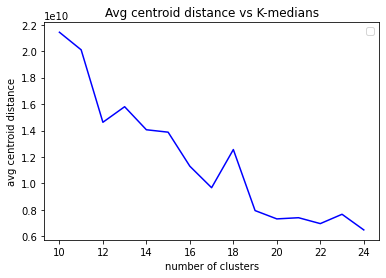

In [26]:
elbowCurve(avg_distance)

Question 4.2

By analyzing the graph we can see that the graph gradually changes at point k=19 and thus creating an elbow shape. From this point, the graph starts to move somewhat parallel to the X-axis. Thus, k=19 is the optimal K value or an optimal number of clusters.

Question 4.3

In [27]:
#Applying K-median clustering with the best value chosen above k = 19
intial = train[0:19]
final_model = kmedians(train, intial)
final_model.process()

In [28]:
final_model

#5. Handling more_than_50k data

1. Preprocessing

In [67]:
#loading the dataset
data1 = pd.read_csv('more_than_50k.csv')

In [68]:
#replacing ? with NaN values
data1 = data1.replace(" ?",np.nan)

In [69]:
data1.shape

(3580, 40)

In [70]:
#counting null values in each column
data1.isnull().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64

In [71]:
#40% is 1432
#dropping columns whose null values count is more than 1432
data1 = data1.drop(['MIGMTR1','MIGMTR3','MIGMTR4','MIGSUN'],axis=1)

2. Feature Analysis

Text(0.5, 1.0, 'ACLSWKR')

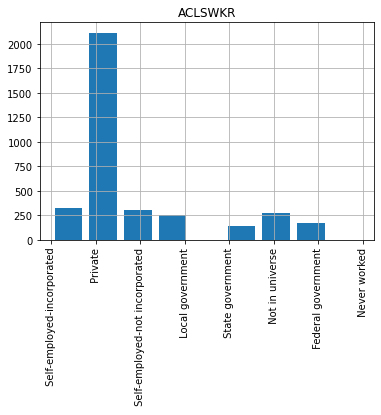

In [72]:
#plotting for categorical value
data1["ACLSWKR"].hist(bins=9, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("ACLSWKR")

Text(0.5, 1.0, 'AHGA')

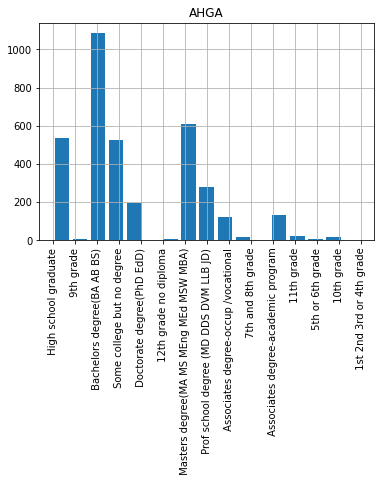

In [73]:
data1["AHGA"].hist(bins=17, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AHGA")

In [ ]:
data1["AHSCOL"].hist(bins=10, figsize=(6, 4),rwidth=0.8)
plt.title("AHSCOL")

Text(0.5, 1.0, 'AMARITL')

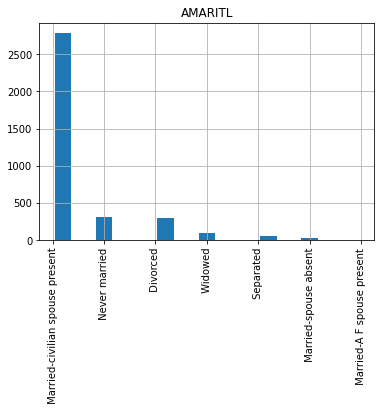

In [75]:
data1["AMARITL"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMARITL")

Text(0.5, 1.0, 'AMJIND')

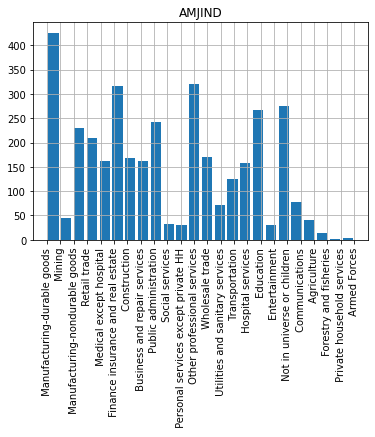

In [76]:
data1["AMJIND"].hist(bins=24, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMJIND")

Text(0.5, 1.0, 'AMJOCC')

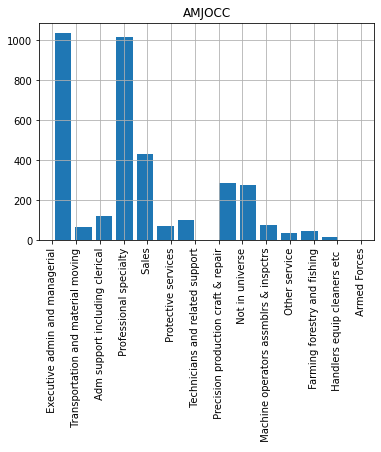

In [77]:
data1["AMJOCC"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AMJOCC")

Text(0.5, 1.0, 'ARACE')

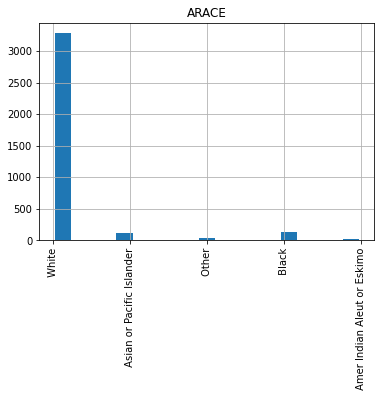

In [78]:
data1["ARACE"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("ARACE")

In [ ]:
data1["AREORGN"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AREORGN")

Text(0.5, 1.0, 'ASEX')

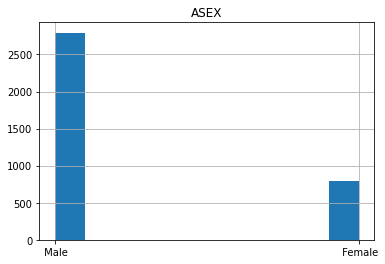

In [79]:
data1["ASEX"].hist(figsize=(6, 4))
plt.title("ASEX")

Text(0.5, 1.0, 'AUNMEM')

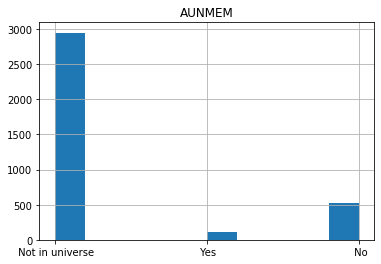

In [80]:
data1["AUNMEM"].hist(figsize=(6, 4))
plt.title("AUNMEM")

Text(0.5, 1.0, 'AUNTYPE')

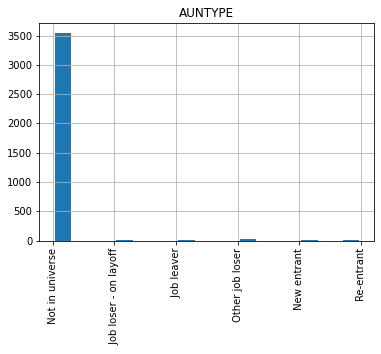

In [81]:
data1["AUNTYPE"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AUNTYPE")

Text(0.5, 1.0, 'AWKSTAT')

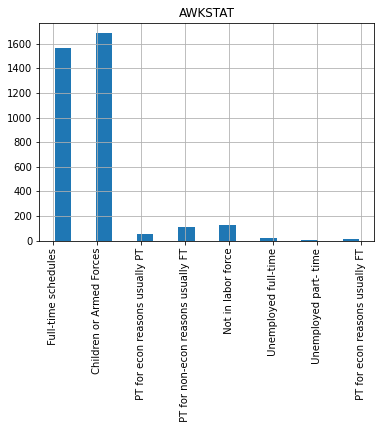

In [82]:
data1["AWKSTAT"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("AWKSTAT")

Text(0.5, 1.0, 'FILESTAT')

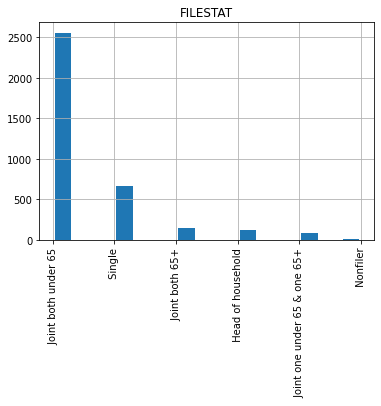

In [83]:
data1["FILESTAT"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("FILESTAT")

Text(0.5, 1.0, 'GRINREG')

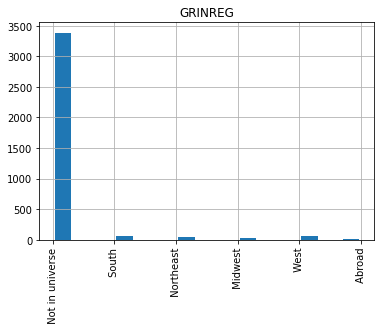

In [84]:
data1["GRINREG"].hist(bins=15, figsize=(6, 4),rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("GRINREG")

Text(0.5, 1.0, 'GRINST')

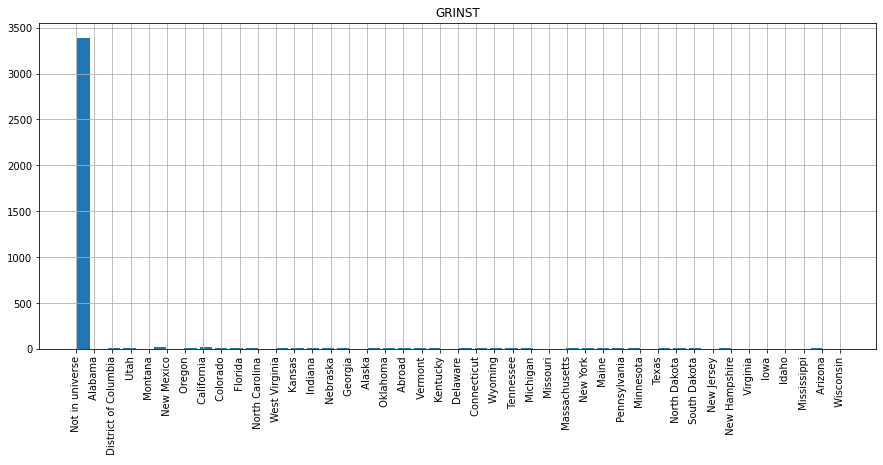

In [85]:
data1["GRINST"].hist(bins=50, figsize=(15, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("GRINST")

Text(0.5, 1.0, 'HHDFMX')

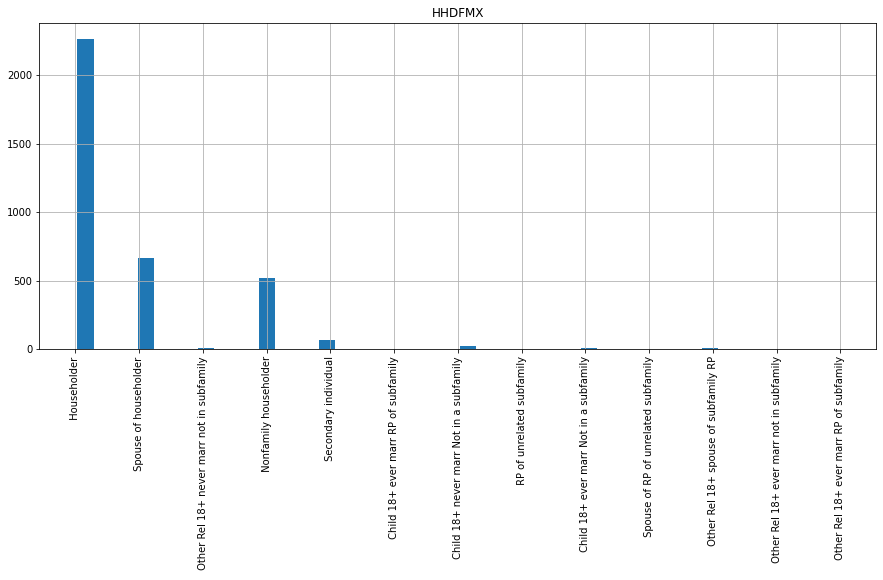

In [86]:
data1["HHDFMX"].hist(bins=38, figsize=(15, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("HHDFMX")

Text(0.5, 1.0, 'HHDREL')

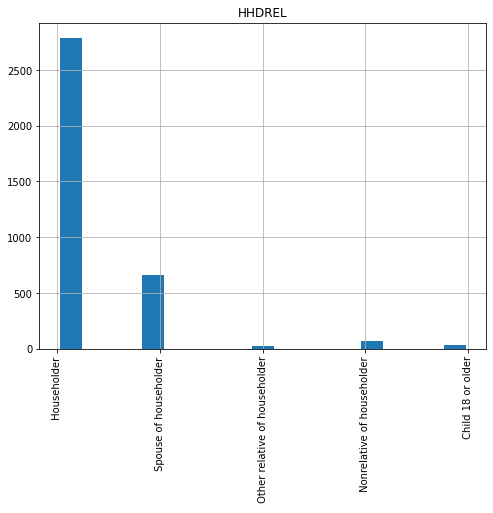

In [87]:
data1["HHDREL"].hist(bins=15, figsize=(8, 6), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("HHDREL")

Text(0.5, 1.0, 'MIGSAME')

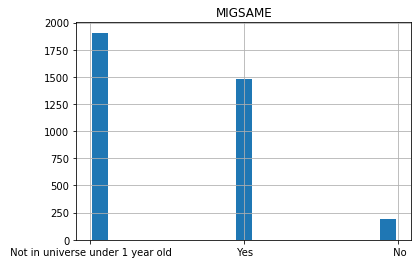

In [89]:
data1["MIGSAME"].hist(bins=15, figsize=(6, 4), rwidth=0.8)
plt.title("MIGSAME")

Text(0.5, 1.0, 'PARENT')

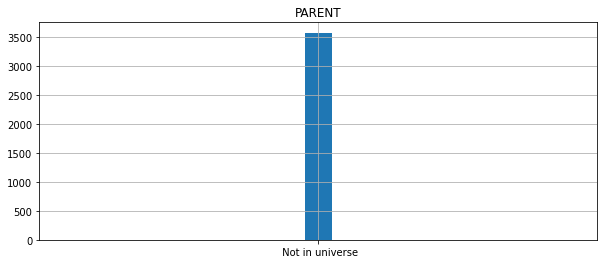

In [88]:
data1["PARENT"].hist(bins=15, figsize=(10, 4), rwidth=0.8)
plt.title("PARENT")

Text(0.5, 1.0, 'PEFNTVTY')

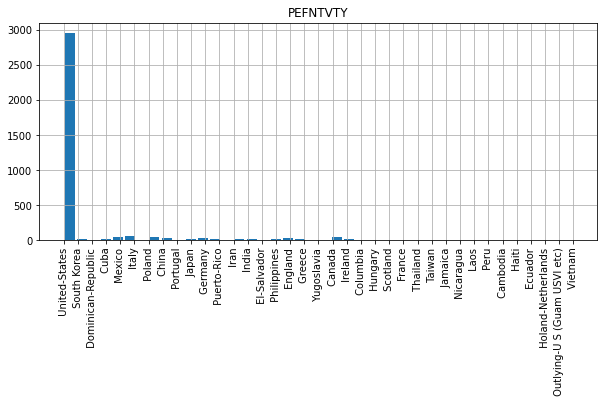

In [94]:
data1["PEFNTVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PEFNTVTY")

Text(0.5, 1.0, 'PEMNTVTY')

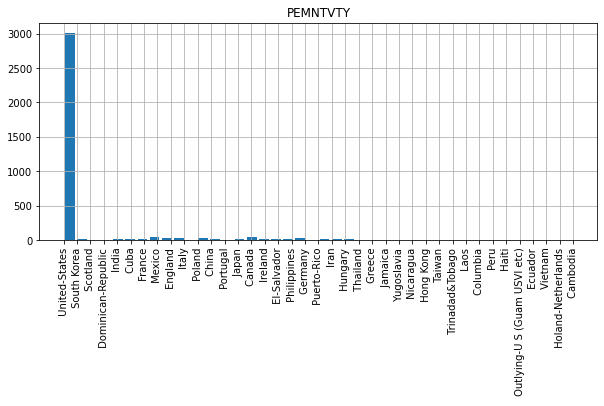

In [93]:
data1["PEMNTVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PEMNTVTY")

Text(0.5, 1.0, 'PENATVTY')

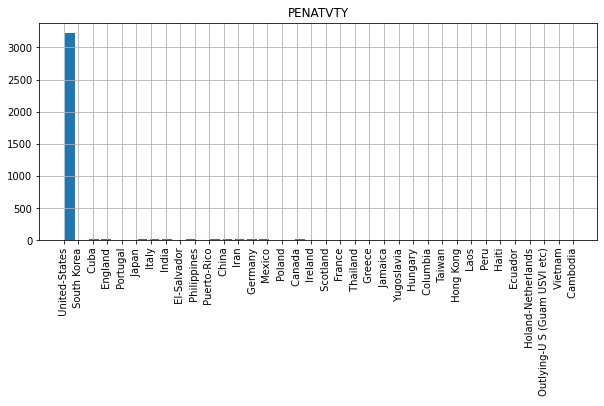

In [92]:
data1["PENATVTY"].hist(bins=42, figsize=(10, 4), rwidth=0.8)
plt.xticks(rotation='vertical')
plt.title("PENATVTY")

Text(0.5, 1.0, 'PRCITSHP')

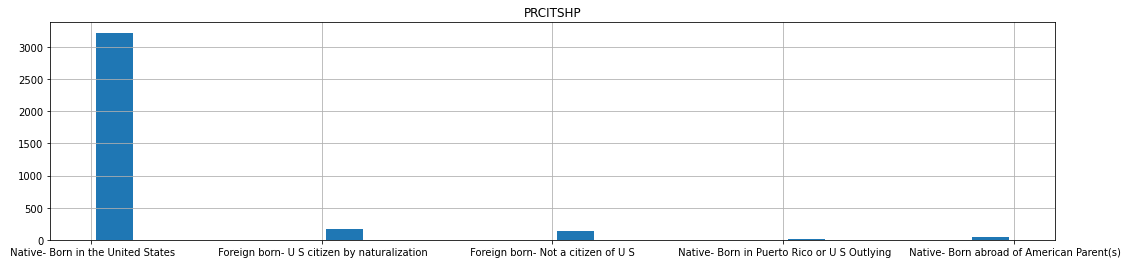

In [91]:
data1["PRCITSHP"].hist(bins=20, figsize=(18, 4), rwidth=0.8)
plt.title("PRCITSHP")

Text(0.5, 1.0, 'VETQVA')

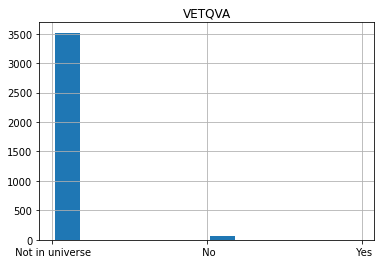

In [90]:
data1["VETQVA"].hist(bins=10, figsize=(6, 4), rwidth=0.8)
plt.title("VETQVA")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f252ab78d90>,
      dtype=object)

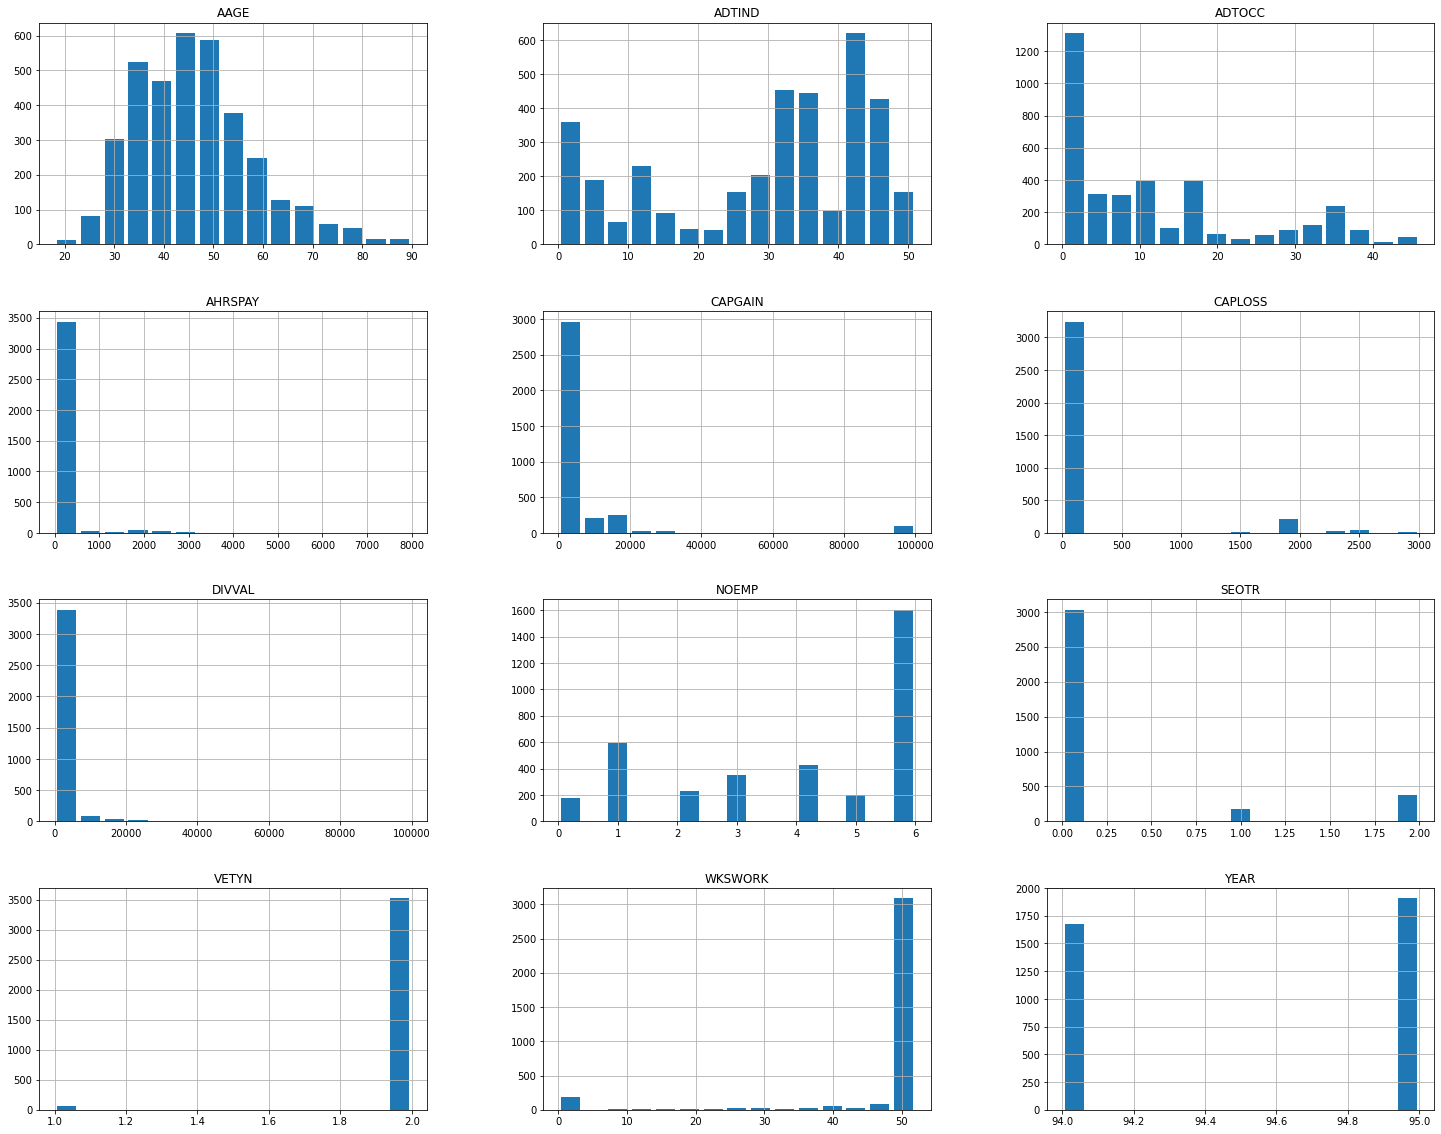

In [95]:
#plots of numerical columns
data1.hist(bins=15, figsize=(25, 20), rwidth=0.8)

In [39]:
#dropping columns same as dataset1
data1 = data1.drop(['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA'],axis=1)

In [40]:
data1.shape

(3580, 19)

3. Imputation, Bucketization, One-Hot Encoding

In [ ]:
data1.isnull().sum()

In [42]:
#Bucketize Numerical features
data1 = bucketize(data1)

In [43]:
#encoding the data
encoded_data1_array = encoding(data1)

(3580, 225)


 Feature Transformation step

In [44]:
#fitting PCA with the number of components that is chosen k=37 above
train1 = pca.fit_transform(encoded_data1_array)

4. Clustering

In [45]:
train1.shape

(3580, 37)

In [46]:
prediction_50k = final_model.predict(train1)

#6. Compare more_than_50k data with Population Data

Question 6.1

In [48]:
#proportion for general population
clusters = final_model.get_clusters()
proportion_pop = list()
for i in range(19):
    proportion_pop.append(len(clusters[i]) / len(train))
proportion_pop = np.array(proportion_pop)

In [49]:
#proportion of more_than_50k data
cluster_50k = np.zeros(19 , dtype = int)
for i in range(len(prediction_50k)):
    cluster_50k[prediction_50k[i]] +=1
proportion_50k = cluster_50k/cluster_50k.sum()

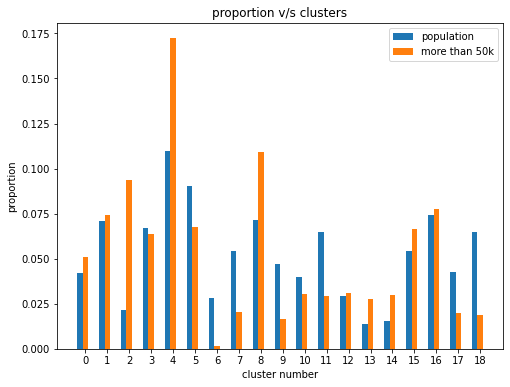

In [65]:
#plotting proportion v/s k clusters
fig = plt.subplots(figsize =(8, 6))
barWidth = 0.25
br1 = np.arange(19)
br2 = [x + barWidth for x in br1]
plt.bar(br1 , proportion_pop, label = 'population',width = barWidth)
plt.bar(br2 , proportion_50k, label = 'more than 50k',width = barWidth)
plt.xticks([r + barWidth for r in range(19)],br1)

plt.title('proportion v/s clusters')
plt.ylabel('proportion')
plt.xlabel('cluster number')
plt.legend(loc="upper right")

Question 6.2

In [58]:
diff = proportion_pop - proportion_50k
diff2 = proportion_50k - proportion_pop

In [60]:
for x in range(1,20):
  print("Difference","      ",x,"       ",diff[x-1])

Difference        1         -0.008993188979179029
Difference        2         -0.003012989051513565
Difference        3         -0.071913755928
Difference        4         0.0029631467138510753
Difference        5         -0.0625996227258996
Difference        6         0.02282154810731976
Difference        7         0.026715399187957133
Difference        8         0.033943526539847814
Difference        9         -0.03759706144965799
Difference        10         0.030086952913424777
Difference        11         0.00916254120826775
Difference        12         0.03568411219417529
Difference        13         -0.0019613160068327196
Difference        14         -0.013720400529564686
Difference        15         -0.014357564019236158
Difference        16         -0.011991828163801954
Difference        17         -0.003317676625231622
Difference        18         0.02222423944795488
Difference        19         0.04586393716611884


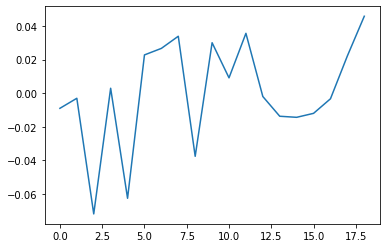

In [61]:
plt.plot(diff)

By analysing the graph cluster 19 seems to be over represented as it has a very large differnce as compare to more than 50k cluster 19

In [59]:
for x in range(1,20):
  print("Difference2","      ",x,"       ",diff2[x-1])

Difference2        1         0.008993188979179029
Difference2        2         0.003012989051513565
Difference2        3         0.071913755928
Difference2        4         -0.0029631467138510753
Difference2        5         0.0625996227258996
Difference2        6         -0.02282154810731976
Difference2        7         -0.026715399187957133
Difference2        8         -0.033943526539847814
Difference2        9         0.03759706144965799
Difference2        10         -0.030086952913424777
Difference2        11         -0.00916254120826775
Difference2        12         -0.03568411219417529
Difference2        13         0.0019613160068327196
Difference2        14         0.013720400529564686
Difference2        15         0.014357564019236158
Difference2        16         0.011991828163801954
Difference2        17         0.003317676625231622
Difference2        18         -0.02222423944795488
Difference2        19         -0.04586393716611884


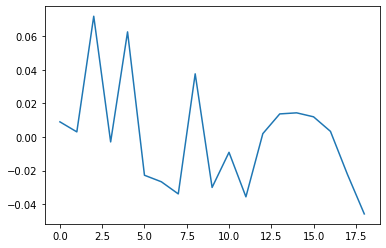

In [62]:
plt.plot(diff2)

By analysing the graph cluster 2 and 4 seems to be over represented as it has a very large differnce as compare to population cluster 2 and 4

Question 6.3